In [1]:
#importiamo le librerie delle quali ci avvarremo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importiamo i dataset che utilizzeremo per effettuare le analisi grafiche
data = pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/PopulationByCity.csv')
share_race_data=pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/ShareRaceByCity.csv', encoding= 'unicode_escape')
fatalshoot = pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/fatalpoliceshootings.csv',index_col='id')
education_data = pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/PercentOver25CompletedHighSchool.csv', encoding= 'unicode_escape')
income_data_per_state=pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/MedianHouseholdIncome2015.csv',  encoding= 'unicode_escape')
population_data=pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/PopulationByCity.csv',  encoding= 'unicode_escape')
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        2832 non-null   object 
 1   state       2832 non-null   object 
 2   population  2832 non-null   float64
 3   lat         2228 non-null   float64
 4   lng         2228 non-null   float64
dtypes: float64(3), object(2)
memory usage: 88.6+ KB


In [3]:
# considerato che nel dataset sono presenti valori relativi all'età mancanti sostituiamoli con la media dell'età
fatalshoot.age.fillna(value=fatalshoot.age.mean(), inplace=True) 
fatalshoot.age = fatalshoot.age.astype(int)

fatalshoot.dropna(subset=["race"], inplace=True) # Eliminiamo i valori mancanti presenti nella colonna race

Nella top 3 degli stati più pericolosi si collocano la California seguita da Texas e Florida .


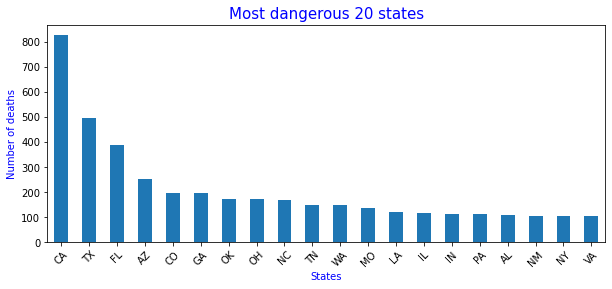

In [4]:
#cerchiamo di capire qual è lo stato con il maggior numero di incidenti di questo tipo
var=fatalshoot.state.value_counts()

#creiamo un bar plot per effettuare la valutazione (consideriamo solo i primi 20 stati)
var[:20].plot( kind="bar", rot=45, figsize=(10,4), label = "state")
plt.xlabel("States", color='blue')
plt.ylabel("Number of deaths", color='blue')
plt.title("Most dangerous 20 states", color='blue', fontsize = 15)
print("Nella top 3 degli stati più pericolosi si collocano la California seguita da Texas e Florida .")

In [5]:
# calcoliamo il numero di soggetti suddivisi per razza appartenenti al campione di riferimento
y = fatalshoot['race'].value_counts(normalize='true',sort='True') # i dati sono normalizzati 

Y=round(y,2) #consideriamo solo le prime 2 cifre dopo la virgola 

Dal grafico emerge il dato secondo cui i soggetti di razza bianca occupano il primo posto per numero di morti;
Nello specifico il 51 % dei decessi, osservati per il campione in esame, ha visto coinvolti individui appartenenti a tale gruppo etnico; Fanno seguito poi le persone di colore che ricoprono una percentuale del 27% del totale, e gli ispanici con il 19%.


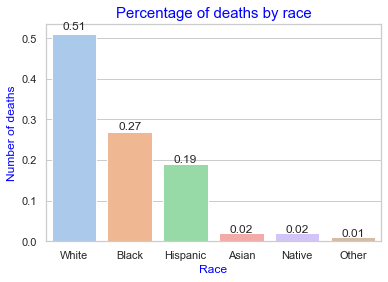

In [6]:
# osserviamo quale razza presenta il riscontro massimo di incidenti del tipo analizzato
race = ['White','Black','Hispanic','Asian','Native','Other'] # lista che contiene le razze del campione
sns.set_theme(style="whitegrid") #tipo di tema applicato al grafico
ax = sns.barplot(x=race, y=Y, data=fatalshoot, palette='pastel') # utilizziamo lo strumento grafico dell'istogramma 
plt.xlabel('Race', color='blue')
plt.ylabel('Number of deaths',color='blue')
plt.title("Percentage of deaths by race", color ='blue',fontsize=15)

# creiamo un loop for in modo da individuare su ogni barra la percentuale corrispondente al valore di decessi per razza 
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

#commentiamo il grafico
print('Dal grafico emerge il dato secondo cui i soggetti di razza bianca occupano il primo posto per numero di morti;')
print("Nello specifico il 51 % dei decessi, osservati per il campione in esame, ha visto coinvolti individui appartenenti a tale gruppo etnico; Fanno seguito poi le persone di colore che ricoprono una percentuale del 27% del totale, e gli ispanici con il 19%.")

In [7]:
print("Al fine di avere una visione più completa del fenomeno è necessario, tuttavia, considerare il totale complessivo di morti in relazione al numero di soggetti residenti negli USA, opportunatamente categorizzati per la variabile 'razza'; ")
print("In tal modo potremmo confermare o confutare la tesi secondo cui le forze dell'ordine US attuino comportamenti discriminatori nei confronti delle minoranze della popolazione;")
print("Per raggiungere tale fine ci avvarremo delle stime sul totale della popolazione redatto dallo U.S.Census Bureau Estimates del 2019.")

Al fine di avere una visione più completa del fenomeno è necessario, tuttavia, considerare il totale complessivo di morti in relazione al numero di soggetti residenti negli USA, opportunatamente categorizzati per la variabile 'razza'; 
In tal modo potremmo confermare o confutare la tesi secondo cui le forze dell'ordine US attuino comportamenti discriminatori nei confronti delle minoranze della popolazione;
Per raggiungere tale fine ci avvarremo delle stime sul totale della popolazione redatto dallo U.S.Census Bureau Estimates del 2019.


In [8]:
#Calcoliamo il totale di soggetti residenti in USA suddivisi per razza
print("Dalle stime risulta che gli USA contino un totale di 334 milioni di persone sul territorio di cui: 201.40 ml di razza bianca, 61.79 ml di ispanici, 44.76 ml di neri, 19.71 ml di razza asiatica, 5.68 mil di nativi ed altre razze 2.4 ml( di seguito si riportano le percentuali 60,3%,18,5%,13,4%,5,9%,1,3%,0,6%)")

# estrapoliamo il numero di morti dei soggetti filtrati per razza osservati nel campione
Total_death_per_race = list(fatalshoot['race'].value_counts())

#creiamo una nuova lista contente il totale di soggetti residenti in us e calssificati per razza
tot_resident = [201400000,44760000,61790000,19710000,4342000,2004000]


Dalle stime risulta che gli USA contino un totale di 334 milioni di persone sul territorio di cui: 201.40 ml di razza bianca, 61.79 ml di ispanici, 44.76 ml di neri, 19.71 ml di razza asiatica, 5.68 mil di nativi ed altre razze 2.4 ml( di seguito si riportano le percentuali 60,3%,18,5%,13,4%,5,9%,1,3%,0,6%)


In [9]:
# calcoliamo il numero di morti considerando la percentuale totale di soggetti per razza
i = 0
new_lst=[]
while i <= 5:
    ratio = ((Total_death_per_race[i]/tot_resident[i])*1000000)
    norm_ratio = (round(ratio,2))
    new_lst.append(norm_ratio)
    i+=1
    continue
else:
    print(new_lst) #controlliamo che la lista contenga le info cui necessitiamo

[14.38, 33.91, 17.17, 5.28, 20.27, 23.45]


Rapportando il numero totale di soggetti, categorizzati per razza, si evince come circa il 34% dei decessi totali abbia coinvolto persone di colore, alle quali fanno seguito con il 23% ed il 20% rispettivamente i soggetti appartenenti alla categoria degli 'altre razze' ed i nativi.
Tale dato conferma, parrebbe confermare la presenza di un comportamento razzista e discriminatorio perpetrato dalle forze dell'ordine statunitensi nei confronti dei gruppi etnici in minoranza.


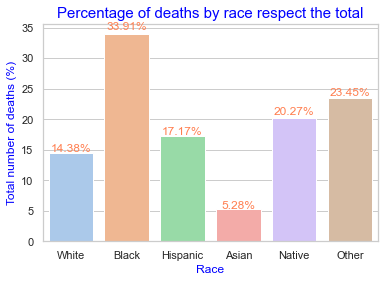

In [10]:
ax = sns.barplot(x = race, y = new_lst, palette = 'pastel') # utilizziamo lo strumento grafico dell'istogramma per la visualizzazione dei dati
plt.xlabel('Race', color='blue')
plt.ylabel('Total number of deaths (%)',color='blue')
plt.title("Percentage of deaths by race respect the total", color ='blue',fontsize=15)

# creiamo un loop for in modo da individuare su ogni barra la percentuale corrispondente al valore di morti dei soggetti osservato 
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center',color='coral')

# commentiamo i risultati
print("Rapportando il numero totale di soggetti, categorizzati per razza, si evince come circa il 34% dei decessi totali abbia coinvolto persone di colore, alle quali fanno seguito con il 23% ed il 20% rispettivamente i soggetti appartenenti alla categoria degli 'altre razze' ed i nativi.")
print("Tale dato conferma, parrebbe confermare la presenza di un comportamento razzista e discriminatorio perpetrato dalle forze dell'ordine statunitensi nei confronti dei gruppi etnici in minoranza." )

C:\Users\dellr\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Il grafico mostra come persone di colore, nativi ed ispanici siano uccisi in età più giovane rispetto ai soggetti bianchi.
Ciò è confermato dalla forma delle distribuzioni che si presentano più ripide nella coda di sinistra;
Osservando più da vicino la distrubuzione della categoria 'black' si può notare come tali individui risultino essere i più precoci nell'avere esperienze con le forze dell'ordine;
Tale dato potrebbe trovare il suo fondamento nella presenza sempre più capillare di gang che lottano per il controllo del territorio, le quali reclutano affiliati sempre di più giovane età tra le proprie fila;
Per approfondimenti sul fenomeno consultare il paper contenuto al seguente link https://www.ojp.gov/pdffiles1/Digitization/146494NCJRS.pdf


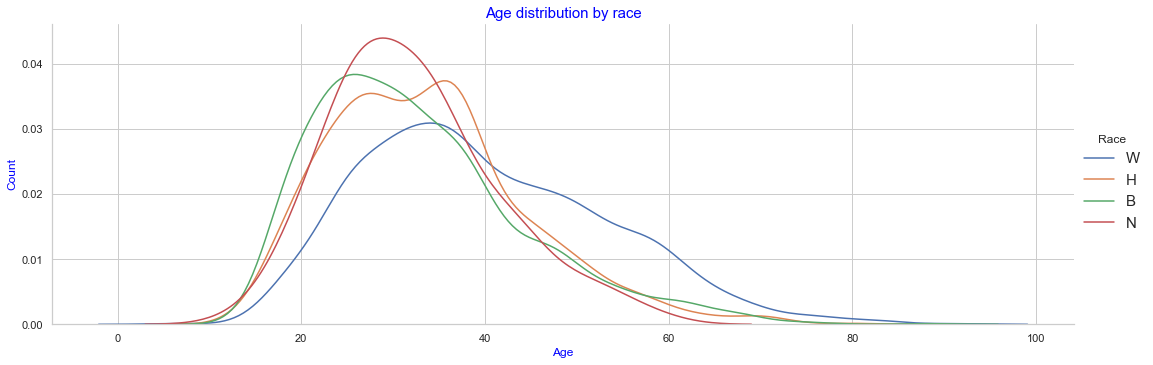

In [11]:
# creaimo una dataset che contenga tutte le razze ad esclusione degli asiatici, che risulatno dal grafico precedente i meno colpiti dal fenomeno

four_races_dataset = fatalshoot.loc[(fatalshoot["race"] == "B") | (fatalshoot["race"] == "W") | (fatalshoot["race"] == "H") | (fatalshoot["race"] == "N")]
g = sns.FacetGrid(data = four_races_dataset, hue="race", aspect=3, size=5) #
g.map(sns.kdeplot,'age')
g.add_legend(title="Race",fontsize=15)
g.set_ylabels("Count",color='blue')
g.set_xlabels("Age",color='blue')
plt.title("Age distribution by race", color='blue', fontsize=15)
print("Il grafico mostra come persone di colore, nativi ed ispanici siano uccisi in età più giovane rispetto ai soggetti bianchi.") 
print("Ciò è confermato dalla forma delle distribuzioni che si presentano più ripide nella coda di sinistra;")
print("Osservando più da vicino la distrubuzione della categoria 'black' si può notare come tali individui risultino essere i più precoci nell'avere esperienze con le forze dell'ordine;")
print("Tale dato potrebbe trovare il suo fondamento nella presenza sempre più capillare di gang che lottano per il controllo del territorio, le quali reclutano affiliati sempre di più giovane età tra le proprie fila;")
print('Per approfondimenti sul fenomeno consultare il paper contenuto al seguente link https://www.ojp.gov/pdffiles1/Digitization/146494NCJRS.pdf')

Il 95.33 % delle vittime sono di sesso maschile.


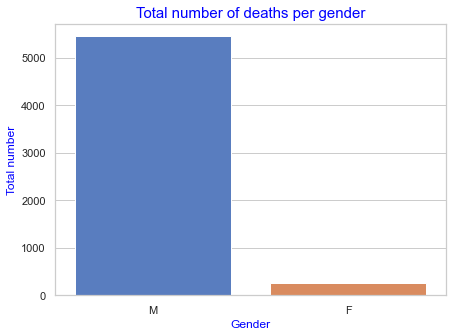

In [12]:
# osserviamo il dato delle morti considerando la variabile 'sesso'

female = fatalshoot[fatalshoot["gender"] == "F"].gender.count()
male = fatalshoot[fatalshoot["gender"] == "M"].gender.count()
perc_male = round((male*100)/(male+female),2) 
# costruiamo l'istogramma
plt.figure(figsize=(7,5))
sns.countplot(data=fatalshoot, x="gender", palette='muted')
plt.title("Total number of deaths per gender",color='blue', fontsize=15)
plt.xlabel('Gender', color='blue')
plt.ylabel('Total number',color='blue')

print (f"Il {perc_male} % delle vittime sono di sesso maschile.")

Dal grafico risulta come il 50% delle distribuzioni dei soggetti di sesso maschile presenti un'età molto simile tra loro che va dai 28 sino ai 35 anni (indipendentemente dalla varibile causa della morte).
Il secondo sottocampione caratterizzato dalle donne al contrario diverge significativamente rispetto alla variabile 'causa del decesso' evidenziando un range d'età molto ristretto, compreso tra i 28 e i 40 anni per i soggetti morti per ferita d'arma da fuoco e teaser .


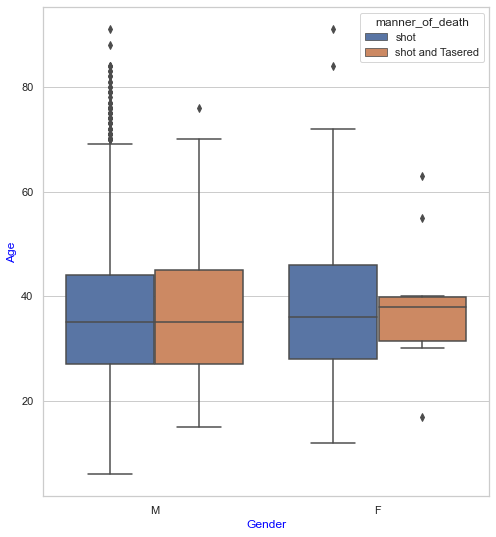

In [13]:
# Utilizziamo un istogramma per la maniera con la quale sono avvenute le morti confrontando tra loro uomini e donne
plt.figure(figsize=(8,9))
sns.boxplot(x="gender" , y="age" ,  hue="manner_of_death" , data=fatalshoot )
plt.xlabel('Gender', color='blue')
plt.ylabel('Age',color='blue')

print("Dal grafico risulta come il 50% delle distribuzioni dei soggetti di sesso maschile presenti un'età molto simile tra loro che va dai 28 sino ai 35 anni (indipendentemente dalla varibile causa della morte).")
print("Il secondo sottocampione caratterizzato dalle donne al contrario diverge significativamente rispetto alla variabile 'causa del decesso' evidenziando un range d'età molto ristretto, compreso tra i 28 e i 40 anni per i soggetti morti per ferita d'arma da fuoco e teaser .")

In [14]:
# Consideriamo il campione rispetto alla variabile armed
tot = fatalshoot['armed'].value_counts().sum() #totale unità statistiche
weapon_list_temp = fatalshoot['armed'].value_counts() #lista provvisoria
weapon_list = ['Gun','Knife','Unarmed','Others'] # lista contenente la tipologia di armi
perc_weapon_list=[(round(3262/tot),2),(round(846/tot),2),(round(405/tot)),(round(1004/tot))]
perc_weapon_list=[59,15,8,18] #normalizziamo la lista considerando i numeri in termini percentuali


L'istogramma mostra come il 59% dei soggetti possedesse una pistola, il 18% 'altre armi' ed il 15% fosse armata di coltello.
Dato interessante è, però, quello relativo ai soggetti disarmati: sebbene la percentuale sia molto bassa, tale statistica potrebbe essere una diretta conseguenza dell'elevato tasso di facilità con il quale è possibile acquistare un'arma da fuoco negli stati uniti;
Difatti, ciò potrebbe avere una sorta di 'impatto psicologico' per gli agenti i quali sarebbero indotti a pensare (senza prove certe) che il soggetto sia armato, andando a sovrastimare la pericolosità dello stesso, adottando quindi 'misure di intervento' che potrebbero sfociare nella tragedia.


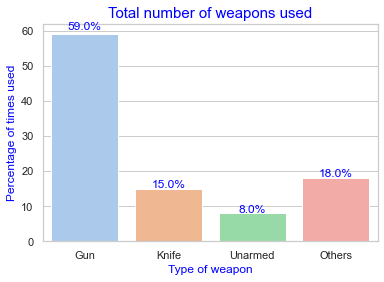

In [15]:
# Utilizziamo l'istogramma per rappresentare i risultati inerenti la tipologia di arma che i soggetti possedevano nello scontro con le forze dell'ordine
ax = sns.barplot(x=weapon_list, y =perc_weapon_list , palette = 'pastel') # utilizziamo lo strumento grafico dell'istogramma per la visualizzazione dei dati
plt.xlabel('Type of weapon', color='blue')
plt.ylabel('Percentage of times used',color='blue')
plt.title("Total number of weapons used", color ='blue',fontsize=15)

# creiamo un loop for in modo da individuare su ogni barra la percentuale corrispondente al valore di morti dei soggetti osservato 
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center',color='blue')
print("L'istogramma mostra come il 59% dei soggetti possedesse una pistola, il 18% 'altre armi' ed il 15% fosse armata di coltello.")
print("Dato interessante è, però, quello relativo ai soggetti disarmati: sebbene la percentuale sia molto bassa, tale statistica potrebbe essere una diretta conseguenza dell'elevato tasso di facilità con il quale è possibile acquistare un'arma da fuoco negli stati uniti;")
print("Difatti, ciò potrebbe avere una sorta di 'impatto psicologico' per gli agenti i quali sarebbero indotti a pensare (senza prove certe) che il soggetto sia armato, andando a sovrastimare la pericolosità dello stesso, adottando quindi 'misure di intervento' che potrebbero sfociare nella tragedia.")

In [16]:
#importiamo il database sui dati relativi al tasso di povertà
poverty_data = pd.read_csv('C:/Users/dellr/OneDrive/Desktop/Nuova cartella/Nuova cartella/PercentagePeopleBelowPovertyLevel.csv', encoding= 'unicode_escape')
poverty_data.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [17]:
#eliminiamo i valori mancanti o le stringhe che rimpiazzano i valori nel caso di 'missing data' con lo 0

poverty_data.poverty_rate.replace(["-"],0.0, inplace = True)
education_data.percent_completed_hs.replace(["-"],0.0, inplace = True)
income_data_per_state.Median_Income.replace(["(X)","-","NaN"],0, inplace = True)
share_race_data.share_white.replace(["(X)","-","NaN"],0, inplace = True)
share_race_data.share_black.replace(["(X)","-","NaN"],0, inplace = True)
share_race_data.share_native_american.replace(["(X)","-","NaN"],0, inplace = True)
share_race_data.share_asian.replace(["(X)","-","NaN"],0, inplace = True)
share_race_data.share_hispanic.replace(["(X)","-","NaN"],0, inplace = True)

#trasformiamo la stringa in valori numerici tipo float

poverty_data.poverty_rate = poverty_data.poverty_rate.astype(float) 
education_data.percent_completed_hs= education_data.percent_completed_hs.astype(float)
income_data_per_state.Median_Income = income_data_per_state.Median_Income.astype(float)
share_race_data.share_white= share_race_data.share_white.astype(float)
share_race_data.share_black= share_race_data.share_black.astype(float)
share_race_data.share_native_american= share_race_data.share_native_american.astype(float)
share_race_data.share_asian= share_race_data.share_asian.astype(float)
share_race_data.share_hispanic= share_race_data.share_hispanic.astype(float)

In [18]:
# convertiamo i risultati ottenuti in maniera che siano confrontabili

states_number = list(poverty_data["Geographic Area"].unique())  # creiamo una lista che contenga tutti gli stati 
numb_death = list(poverty_data['Geographic Area'].value_counts()) # lista che annovera il numero di morti dal dataset poverty_data filtrati per area geografica
population_per_state = population_data.groupby(['state']).population.sum()  #numero totale di soggetti raggrupati per stato

In [19]:
#creiamo le liste che utilizzeremo per accogliere i dati
white_rate_temp = []  
black_rate_temp=[]
native_rate_temp=[]
asian_rate_temp=[]
hispanic_rate_temp=[]
#utilizziamo un ciclo for allo scopo di ottenere una lista per ogni razza che annoveri la percentuale di individui che occupano una determinata area geografica
for p in states_number:
    race_index = share_race_data[share_race_data['Geographic area'] == p]
    white_race_rate = (sum(race_index.share_white)/len(race_index)/100)
    black_race_rate = (sum(race_index.share_black)/len(race_index)/100)
    native_race_rate = (sum(race_index.share_native_american)/len(race_index)/100)
    asian_race_rate = (sum(race_index.share_asian)/len(race_index)/100)
    hispanic_race_rate = (sum(race_index.share_hispanic)/len(race_index)/100)
    white_rate_temp.append(white_race_rate)
    black_rate_temp.append(black_race_rate)
    native_rate_temp.append(native_race_rate)
    asian_rate_temp.append(asian_race_rate)
    hispanic_rate_temp.append(hispanic_race_rate)
    
# normalizziamo i risultati considerando solo le prime due cifre dopo la virgola   
white_share_ratio =  [round(x,2) for x in white_rate_temp]
black_share_ratio =  [round(x,2) for x in black_rate_temp]
native_share_ratio =  [round(x,2) for x in native_rate_temp]
asian_share_ratio =  [round(x,2) for x in asian_rate_temp]
hispanic_share_ratio =  [round(x,2) for x in hispanic_rate_temp]

In [20]:
edu_rate_temp = []  #lista che utilizzeremo per accogliere i dati considerando il dataset education

# ciclo for di cui ci avvaliamo per pervenire al tasso di educazione calcolato come rapporto tra l'indice di completamento delle scuole superiori rispetto al totale dei dati osservati 
for j in states_number:
    edu_index = education_data[education_data['Geographic Area'] == j]
    edu_rate = (sum(edu_index.percent_completed_hs)/len(edu_index)/100)
    edu_rate_temp.append(edu_rate)


education_ratio =  [round(x,2) for x in edu_rate_temp] #normalizziamo i risultati considerando solo le prime due cifre dopo la virgola  


In [21]:
area_poverty_ratio_temp = []  #lista che utilizzeremo per accogliere i dati

# utilizziamo lo stesso procedimento visto in precedenza per calcolare il tasso di povertà individuato per i 51 stati osservati
for i in states_number:
    geo_index = poverty_data[poverty_data['Geographic Area'] == i]
    area_poverty_rate = (sum(geo_index.poverty_rate)/len(geo_index)/100)
    area_poverty_ratio_temp.append(area_poverty_rate)
area_poverty_ratio =  [round(x,2) for x in area_poverty_ratio_temp] 

# creiamo un nuovo dataset che contenga i dati che abbiamo calcolato    
new_data = pd.DataFrame({"states_number": states_number , 
                         "area_poverty_ratio": area_poverty_ratio,
                         "number_death_per_state": numb_death,
                         "education_ratio":education_ratio,
                         "total_population":population_per_state,
                         "white_share_ratio":white_share_ratio,
                         "black_share_ratio":black_share_ratio,
                         "native_share_ratio":native_share_ratio,
                         "asian_share_ratio":asian_share_ratio,
                         "hispanic_share_ratio":hispanic_share_ratio})

Il grafico sotto riportato evidenzia la presenza di un legame di correlazione che lega la varibile 'numero di morti' al tasso di povertà. 
Seppur il grado di correlazione non risulti particolarmente elevato, è possibile individuare la presenza di un trend monotono crescente che enfatizza come all'aumentare del tasso di povertà, aumenti quello di criminalità e quindi vi sia una maggiore probabilità di interventi delle forze di polizia .


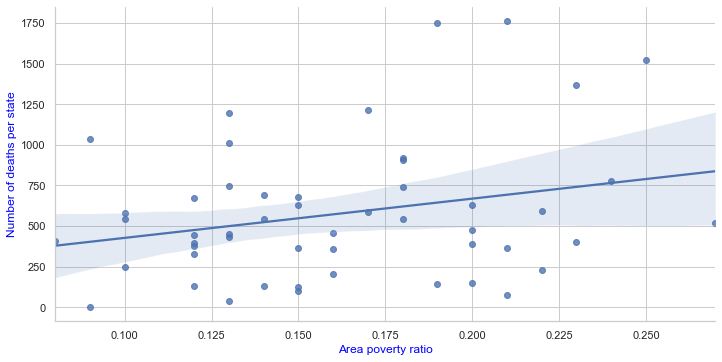

In [22]:
#cerchiamo di capire se esiste una possibile correlazione tra le varibili tasso di povertà e numero di morti 

sns.lmplot(x='area_poverty_ratio', y='number_death_per_state', data=new_data, aspect=2, palette='bright')
plt.ylabel("Number of deaths per state",color='blue')
plt.xlabel('Area poverty ratio',color='blue')

#commentiamo il grafico
print("Il grafico sotto riportato evidenzia la presenza di un legame di correlazione che lega la varibile 'numero di morti' al tasso di povertà. ")
print("Seppur il grado di correlazione non risulti particolarmente elevato, è possibile individuare la presenza di un trend monotono crescente che enfatizza come all'aumentare del tasso di povertà, aumenti quello di criminalità e quindi vi sia una maggiore probabilità di interventi delle forze di polizia .")



Il diagramma a dispersione mostra la presenza di una forte correlazione negativa tra le variabili analizzate; Come era facile prevedere all'aumentare del tasso di istruzione dei soggetti diminusce il tasso di povertà degli stessi, che potranno accedere a livelli di reddito più elevati .


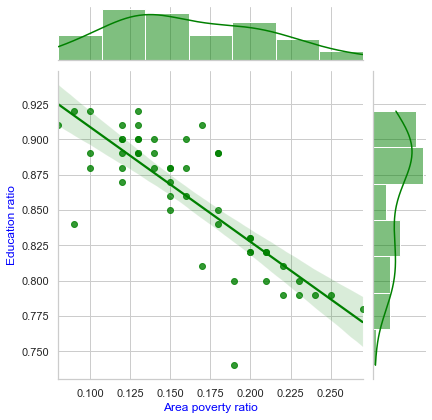

In [23]:
# cerchiamo di individuare la presenza di un legame lineare che lega le varibaili 'livello di educazione' e tasso di povertà

sns.jointplot(x='area_poverty_ratio', y='education_ratio', kind="reg", data=new_data, color='green')  #all'aumentare del tasso di istruzione dimunisce il livello di povertà dei soggetti
plt.ylabel("Education ratio",color='blue')
plt.xlabel('Area poverty ratio',color='blue')

#commento ai risultati

print("Il diagramma a dispersione mostra la presenza di una forte correlazione negativa tra le variabili analizzate; Come era facile prevedere all'aumentare del tasso di istruzione dei soggetti diminusce il tasso di povertà degli stessi, che potranno accedere a livelli di reddito più elevati .")


In [24]:
print("A questo punto dell'analisi vogliamo suddividere il territorio statunitense nelle sue principali 5 aree con l'intento di portare alla luce possibili dati interessanti sul fenomeno;")

A questo punto dell'analisi vogliamo suddividere il territorio statunitense nelle sue principali 5 aree con l'intento di portare alla luce possibili dati interessanti sul fenomeno;


In [25]:
# creiamo la lista delle 5 aree geografiche nelle quali andremo a dividere il terriotorio USA

west_coast_abb = ['CA','OR','DC','AK','NV','HI']
east_coast_abb = ['VT','PA','WA','ME','NH','MA','RI','CT','NY','NJ','DE','MD']
mid_west_abb = ['IL','IN','IA','MI','MN','MO','OH','WI','ND','SD','KS','NE']
rocky_mountain_abb = ['CO','ID','MT','UT','WY','AZ','NM']
south = ['AL','AR','DE','FL','GA','KY','LA','MS','NC','SC','OK','TN','TX','VA','WV']


In [26]:
#creiamo un nuovo dataset che suddivida gli stati per area geografica utilizzando la funzione new_col

def new_col(row):
    if row['states_number'] in west_coast_abb:
        string = 'West coast'
    elif row['states_number'] in east_coast_abb:
        string = 'Est coast'
    elif row['states_number'] in mid_west_abb:
        string = 'Mid west'
    elif row['states_number'] in rocky_mountain_abb:
        string = 'Rocky mountain'
    else:
        string = 'South'
    return string

#creaimo una nuova colonna 'geographic area' usando la funzione di sopra
new_data['Geographic area'] = new_data.apply(new_col, axis=1)

Suddividendo il territorio statunitense nelle 5 principali aree geografiche cui si compone, è possibile osservare come il baffo superiore della categoria 'west coast' sia il più esteso, indicando come gli stati appartenenti a tale area geografica siano più pericolosi in quanto caratterizzati da un numero maggiore di morti. Ciò è confermato dal valore della mediana che risulta il più elevato.
Ulteriore dato interessante riguarda gli stati appartenenti alla 'east coast', la cui distribuzione evidenzia come il 50% di tali regioni faccia registrare un numero di decessi compresi tra la fascia che va dai 280 alle 400 morti totali.


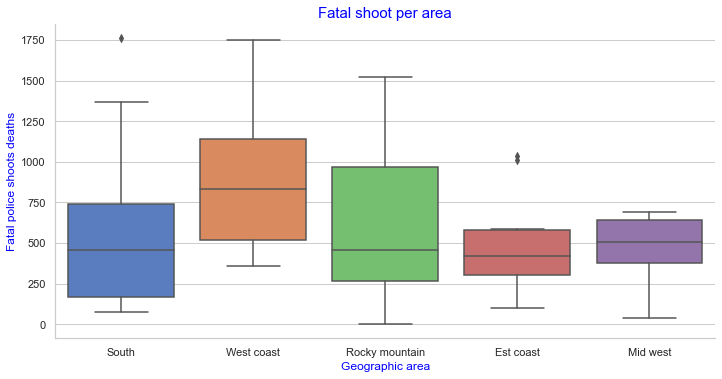

In [27]:
# attraverso lo strumento grafico della scatola a baffi compariamo il numero di morti per area geografica

sns.catplot(y="number_death_per_state",x="Geographic area", kind="box", data=new_data, aspect=2, palette='muted')
plt.ylabel("Fatal police shoots deaths",color='blue')
plt.xlabel('Geographic area',color='blue')
plt.title('Fatal shoot per area',color='blue',fontsize=15)

#commento ai risultati

print("Suddividendo il territorio statunitense nelle 5 principali aree geografiche cui si compone, è possibile osservare come il baffo superiore della categoria 'west coast' sia il più esteso, indicando come gli stati appartenenti a tale area geografica siano più pericolosi in quanto caratterizzati da un numero maggiore di morti. Ciò è confermato dal valore della mediana che risulta il più elevato.")
print("Ulteriore dato interessante riguarda gli stati appartenenti alla 'east coast', la cui distribuzione evidenzia come il 50% di tali regioni faccia registrare un numero di decessi compresi tra la fascia che va dai 280 alle 400 morti totali.")

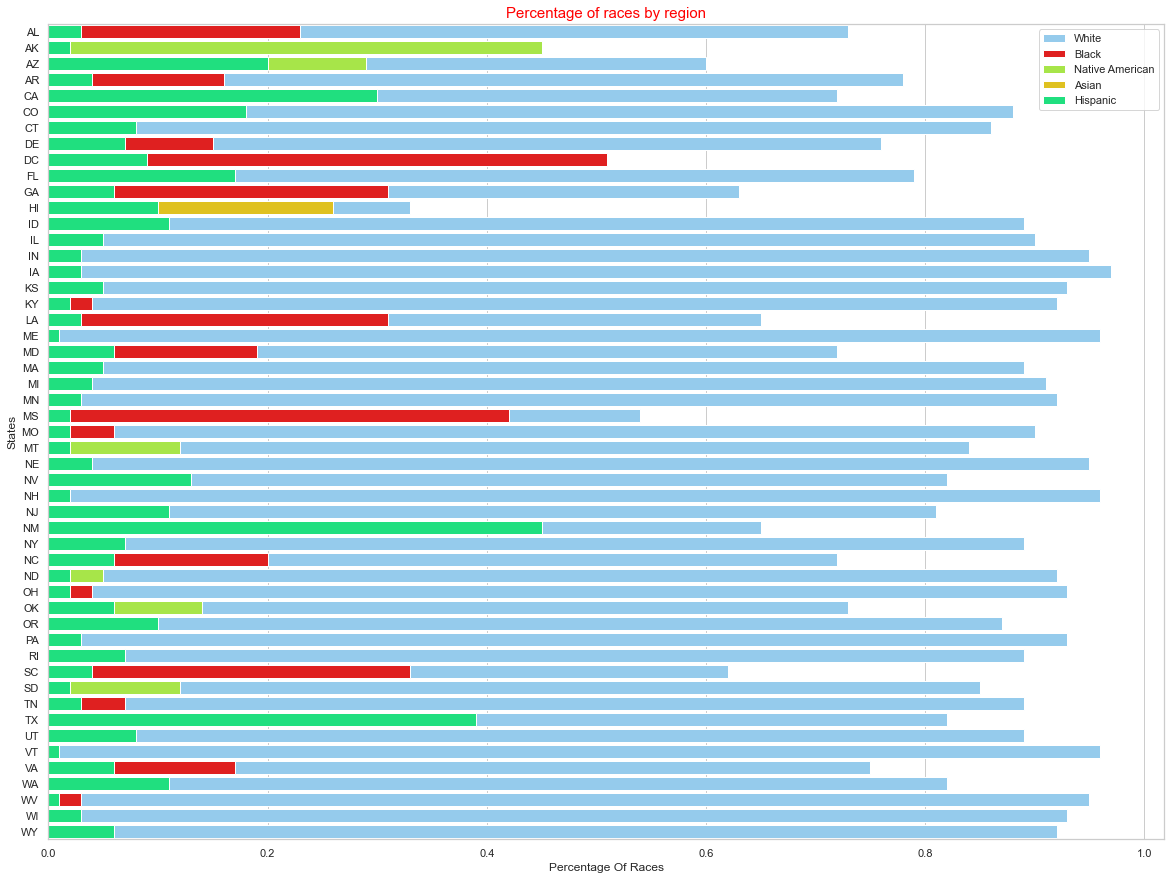

Il grafico ovviamente conferma le rilevazioni effettuate in precedenza, aggiungendo, tuttavia, alcuni elementi di novità: è possibile osservare come le 3 principali etnie (ispanici, bianchi e neri) siano largamente diffuse in tutto il territorio statunitense a macchia d'olio senza particolari concentrazioni.
Al contrario una percentuale notevole di soggetti asiatici risulta stanziata prevalentemente nello stato dello Hawaii (HI)
Non sorprende, infine, il dato sui nativi i quali occupano principalmente le regioni appartenenti alla Rocky Mountains (Arkansas, Arizona, Montana le principali) .


In [28]:
#osserviamo la distribuzione percentuale delle diverse etnie nei 51 stati analizzati
plt.figure(figsize=(20,15))
sns.barplot(x=white_share_ratio, y=states_number, color="lightskyblue", label="White")
sns.barplot(x=black_share_ratio, y=states_number,color="red",label="Black")
sns.barplot(x=native_share_ratio, y=states_number, color="greenyellow",label="Native American")
sns.barplot(x=asian_share_ratio, y=states_number, color="gold", label="Asian")
sns.barplot(x=hispanic_share_ratio, y=states_number,color='springgreen', label="Hispanic")
plt.xlabel("Percentage Of Races")
plt.ylabel("States")
plt.title("Percentage of races by region",color='red',fontsize=15)
plt.legend()
plt.show()
print("Il grafico ovviamente conferma le rilevazioni effettuate in precedenza, aggiungendo, tuttavia, alcuni elementi di novità: è possibile osservare come le 3 principali etnie (ispanici, bianchi e neri) siano largamente diffuse in tutto il territorio statunitense a macchia d'olio senza particolari concentrazioni.")
print("Al contrario una percentuale notevole di soggetti asiatici risulta stanziata prevalentemente nello stato dello Hawaii (HI)")
print("Non sorprende, infine, il dato sui nativi i quali occupano principalmente le regioni appartenenti alla Rocky Mountains (Arkansas, Arizona, Montana le principali) .")

C:\Users\dellr\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dellr\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


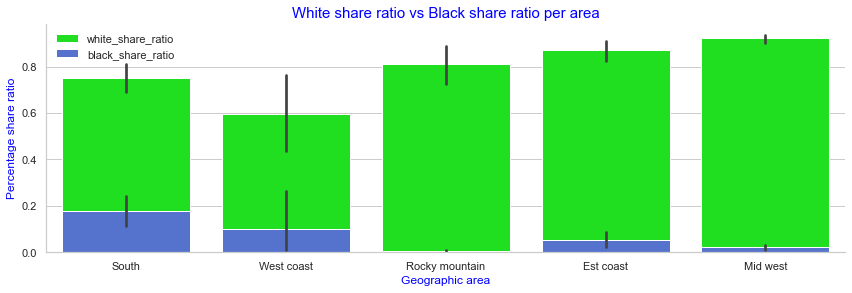

In [29]:
#utilizzando un istogramma osserviamo come sono distribuite per area geografivìca le 2 principali razze in accordo all'area geografica
g = sns.FacetGrid(new_data,height=4, aspect=3)
g.map(sns.barplot,'Geographic area', "white_share_ratio",color='lime',label='white_share_ratio')
g.map(sns.barplot,'Geographic area', "black_share_ratio",color='royalblue',label='black_share_ratio')
plt.xlabel('Geographic area',color='blue')
plt.ylabel('Percentage share ratio',color='blue')
plt.title('White share ratio vs Black share ratio per area',color='blue',fontsize=15)
plt.legend(loc='upper left',framealpha=0)

C:\Users\dellr\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dellr\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\dellr\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


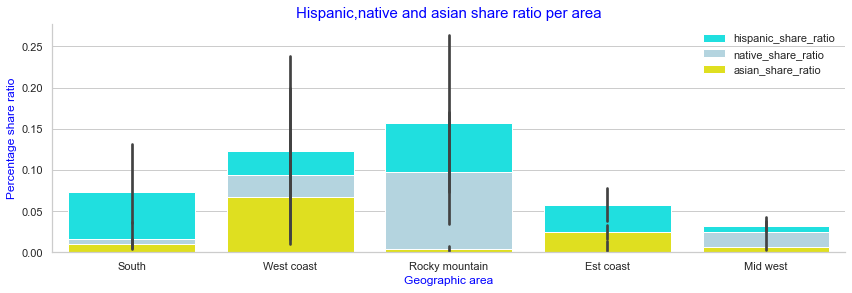

In [30]:
#utilizzando un istogramma osserviamo come sono distribuite per area geografivìca le restanti razze in accordo all'area geografica
g = sns.FacetGrid(new_data,height=4, aspect=3)
g.map(sns.barplot,'Geographic area', "hispanic_share_ratio",color='aqua',label='hispanic_share_ratio')
g.map(sns.barplot,'Geographic area', "native_share_ratio",color='lightblue',label='native_share_ratio')
g.map(sns.barplot,'Geographic area', "asian_share_ratio",color='yellow',label='asian_share_ratio')
plt.xlabel('Geographic area',color='blue')
plt.ylabel('Percentage share ratio',color='blue')
plt.title('Hispanic,native and asian share ratio per area',color='blue',fontsize=15)
plt.legend(loc='upper right',framealpha=0)

In [31]:
print("Gli ultimi 2 grafici confermano quanto detto in precedenza; va però sottolineato come la popolazione asiatica, seppur presente in maggior percentuale nella west coast, vanta un numero notevole di presenze anche sull'altra costa americana .")

Gli ultimi 2 grafici confermano quanto detto in precedenza; va però sottolineato come la popolazione asiatica, seppur presente in maggior percentuale nella west coast, vanta un numero notevole di presenze anche sull'altra costa americana .


In [32]:
#effettuiamo le nostre conclusioni sulla base dei dati raccolti
print("Sulla base delle analisi effettuate è possibile concludere come vi sia una, effettiva, componente di razzismo tra le forze dell'ordine statunitensi pepetrato nei confronti delle minoranze etniche (in particolare neri, ispanici e nativi).")
print("E'opportuno, tuttavia considerare che il campione utilizzato come riferimento per effettuare le analisi è relativamente recente, per cui annovera al suo interno un numero di unità statistiche non particolarmente elevato (considerata la grandezza del continente americano) e ciò potrebbe inficiare sulla rappresentatività dei dati rispetto al fenomeno studiato .")
print("Arrivati alla fine del lavoro vorrei condividere il mio pensiero in merito al fenomeno ad oggetto. Credo che uno dei principali problemi che affligge gli stati uniti (e che conseguentemente va ad incrementare ogni anno le statistiche di tale dataset) sia imputabile all'estrema facilità con la quale sia possibile reperire un'arma da fuoco nel continente.")
print("Basti pensare alla statistica (consultabile al seguente indirizzo https://robarguns.com/gun-sales-in-the-us-by-state) secondo cui per ogni Mc Donalds presente su suolo amaericano siano presenti circa 3 Gun shop.")
print("Dall'altro canto credo che ulteriore problematica sia da ricercare nelle regole di 'condotta' delle forze dell'ordine degli USA, le cui 'politiche' di utilizzo dell'arma da fuoco di ordinanza risultino poco stringenti, lasciando sovente ampia discezionalità alla personale interpretazione dell'agente intervenuto .")
print("Ribadisco che gli ultimi due interventi rappresentano pareri strettamente personali non supportati da evidenze di sorta, e come tali puramente speculativi.")

Sulla base delle analisi effettuate è possibile concludere come vi sia una, effettiva, componente di razzismo tra le forze dell'ordine statunitensi pepetrato nei confronti delle minoranze etniche (in particolare neri, ispanici e nativi).
E'opportuno, tuttavia considerare che il campione utilizzato come riferimento per effettuare le analisi è relativamente recente, per cui annovera al suo interno un numero di unità statistiche non particolarmente elevato (considerata la grandezza del continente americano) e ciò potrebbe inficiare sulla rappresentatività dei dati rispetto al fenomeno studiato .
Arrivati alla fine del lavoro vorrei condividere il mio pensiero in merito al fenomeno ad oggetto. Credo che uno dei principali problemi che affligge gli stati uniti (e che conseguentemente va ad incrementare ogni anno le statistiche di tale dataset) sia imputabile all'estrema facilità con la quale sia possibile reperire un'arma da fuoco nel continente.
Basti pensare alla statistica (consultabile 